<a href="https://colab.research.google.com/github/JossRoss04/mineriaDeDatos/blob/main/mineriaDeDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Míneria de Datos

## Primer parcial

### Introducción

#### Conceptos

**Mineria de Datos:** Es la recolección de datos implementando distintas estrategias y herramientas con el fin de excarvar sus patrones, llevandolas al analisis para la predicción y descripción de información.

#### Ciencia de Datos

In [ ]:
# La función help nos muestra la ayuda
help(len)

Help on built-in function len in module builtins:

len(obj, /)
    Return the number of items in a container.



In [ ]:
# Otra forma de obtener ayuda es utilizando el caracter ?
len?

In [ ]:
# Así creamos una lista
L = [1, 2, 3]

In [ ]:
L.insert?

In [ ]:
L?

Object `L` not found.


In [ ]:
 # Ejemplo con una función con Docstring
 def square(a):
  """Return the square of a."""
  return a ** 2



In [ ]:
square(5)

25

####IPython Magic Commands

#####Timing Code Execution:

In [ ]:
#Sirve para evaluar el desempeño de una expresión en cuanto a tiempo
%timeit L = [n ** 2 for n in range(1000)]

The slowest run took 4.90 times longer than the fastest. This could mean that an intermediate result is being cached.
122 µs ± 88.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
#Con doble % podemos evaluar el desempeño de multiples lineas
%%timeit
L=[]
for n in range(1000):
  L.append(n**2)

93.8 µs ± 27 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
!ls

sample_data


In [ ]:
!pwd

/content


In [ ]:
!echo

In [ ]:
directory = !pwd

In [ ]:
print(directory)

['/content']


In [ ]:
%cd /content/

/content


In [ ]:
%ls

sample_data/


####Understanding Data Types in Python

In [ ]:
import numpy as np

In [ ]:
np.array([1, 4, 2, 5, 3])

array([1, 4, 2, 5, 3])

In [ ]:
np.array([3.14, 4, 2, 3])

array([3.14, 4.  , 2.  , 3.  ])

In [ ]:
np.array([3.14, 4, 2, 3], dtype='float32')

array([3.14, 4.  , 2.  , 3.  ], dtype=float32)

In [ ]:
np.array([3.14, 4, 2, 3], dtype='int')

array([3, 4, 2, 3])

In [ ]:
# Cuando el argumento de np.array es una iteración anidada
# genera una matriz
np.array([range(i, i+3) for i in (2, 4, 6)])

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

In [ ]:
[range(i, i+3) for i in [2, 3, 4]]


[range(2, 5), range(3, 6), range(4, 7)]

In [ ]:
np.full((3,5), 3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [ ]:
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [ ]:
np.random.random((3,3))

array([[0.29157051, 0.82690341, 0.77461723],
       [0.70308866, 0.18499014, 0.84411985],
       [0.20195221, 0.25831772, 0.87055555]])

In [ ]:
np.random.normal(0,1, (3,3))

array([[-0.83646332, -0.12699417, -1.04347534],
       [-0.065631  , -0.06837233,  0.17135953],
       [-0.68735843, -0.82006078, -0.0860483 ]])

In [ ]:
np.random.randint(0, 10, (3,3))

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

####Cuadros estadísticos

In [2]:
import numpy as np #Calculo estadistico
import pandas as pd #funciones para procesar columnas
from io import StringIO
import matplotlib.pyplot as plt
#El dataframe creara la tabla, columna de texto y otra columna de número

#Tamaño y estilo de gráficos
plt.rcParams['figure.dpi']
plt.style.use('seaborn-v0_8-whitegrid')


raw = """Marca temporal\tNúmero de matrícula\t¿Cuántos años cumplidos tienes?\t¿Has realizado programas utilizando Python?\t¿Has utilizado Google Colab?\t¿Tienes cuenta de GitHub?
19/01/2026 18:32:18\t178920\t22\tSi\tNo\tSi
19/01/2026 18:32:23\t182712\t21\tSi\tNo\tSi
19/01/2026 18:32:25\t180370\t26\tSi\tSi\tSi
19/01/2026 18:32:27\t182570\t21\tSi\tSi\tSi
19/01/2026 18:32:28\t177622\t24\tSi\tNo\tSi
19/01/2026 18:32:29\t175166\t22\tSi\tSi\tSi
19/01/2026 18:32:30\t177573\t22\tSi\tSi\tSi
19/01/2026 18:32:35\t178430\t21\tSi\tSi\tSi
19/01/2026 18:32:38\t179169\t23\tSi\tNo\tSi
19/01/2026 18:32:41\t177263\t22\tSi\tSi\tSi
19/01/2026 18:32:48\t179884\t23\tSi\tNo\tSi
19/01/2026 18:32:48\t183016\t22\tSi\tNo\tSi
19/01/2026 18:32:50\t179033\t23\tSi\tSi\tNo
19/01/2026 18:32:54\t178218\t22\tSi\tNo\tSi
19/01/2026 18:32:55\t178446\t22\tSi\tSi\tSi
19/01/2026 18:33:00\t178166\t22\tSi\tSi\tNo
19/01/2026 18:33:02\t177406\t22\tSi\tNo\tSi
19/01/2026 18:33:05\t177192\t22\tSi\tSi\tSi
19/01/2026 18:33:08\t182451\t21\tSi\tNo\tSi
19/01/2026 18:33:08\t171513\t24\tNo\tNo\tSi
19/01/2026 18:33:09\t181619\t21\tSi\tNo\tSi
19/01/2026 18:33:12\t182298\t23\tSi\tNo\tSi
19/01/2026 18:33:14\t181419\t24\tNo\tNo\tSi
19/01/2026 18:33:32\t177291\t21\tSi\tSi\tSi
19/01/2026 18:33:42\t182085\t22\tSi\tNo\tSi
19/01/2026 18:33:53\t176453\t22\tSi\tNo\tSi
19/01/2026 18:34:04\t176263\t24\tSi\tNo\tSi
19/01/2026 18:34:06\t179997\t21\tSi\tNo\tSi
19/01/2026 18:36:21\t175842\t23\tSi\tNo\tNo
19/01/2026 20:19:21\t179913\t20\tSi\tNo\tSi
19/01/2026 20:19:48\t177301\t22\tSi\tSi\tNo
19/01/2026 20:20:06\t183060\t21\tSi\tNo\tSi
19/01/2026 20:20:08\t177935\t22\tSi\tSi\tSi
19/01/2026 20:20:19\t177700\t20\tSi\tSi\tSi
19/01/2026 20:20:26\t178318\t24\tSi\tSi\tSi
19/01/2026 20:20:27\t174653\t24\tSi\tNo\tSi
19/01/2026 20:20:29\t177139\t21\tSi\tNo\tSi
19/01/2026 20:20:31\t173479\t25\tSi\tNo\tNo
19/01/2026 20:20:39\t175588\t23\tNo\tNo\tSi
19/01/2026 20:20:45\t178774\t23\tSi\tSi\tSi
19/01/2026 20:20:45\t175031\t23\tSi\tNo\tNo
19/01/2026 20:20:49\t178396\t21\tSi\tSi\tSi
19/01/2026 20:20:49\t172068\t23\tNo\tNo\tNo
19/01/2026 20:20:50\t174197\t23\tNo\tNo\tSi
19/01/2026 20:20:55\t178584\t22\tSi\tNo\tSi
19/01/2026 20:20:55\t175329\t24\tSi\tNo\tSi
19/01/2026 20:20:56\t177685\t22\tSi\tSi\tSi
19/01/2026 20:20:57\t178678\t22\tNo\tNo\tSi
19/01/2026 20:21:04\t177143\t22\tSi\tNo\tSi
19/01/2026 20:21:07\t182318\t26\tSi\tNo\tSi
19/01/2026 20:21:27\t182377\t20\tSi\tNo\tSi
19/01/2026 20:21:34\t179419\t22\tSi\tNo\tNo
19/01/2026 20:21:35\t181662\t21\tSi\tNo\tSi
19/01/2026 20:21:38\t181760\t21\tSi\tNo\tSi
19/01/2026 20:22:06\t177888\t22\tSi\tNo\tSi
19/01/2026 20:22:15\t176535\t25\tSi\tNo\tSi
19/01/2026 20:22:29\t179862\t21\tSi\tNo\tSi
19/01/2026 20:22:32\t178378\t22\tSi\tNo\tSi
19/01/2026 20:22:50\t177451\t22\tSi\tNo\tSi
19/01/2026 20:23:15\t179804\t21\tSi\tNo\tSi
"""

# Cargar datos
df = pd.read_csv('/content/drive/MyDrive/UPSLP/mineriaDeDatos/raw.csv')
#df = pd.read_csv(StringIO(raw), sep='\t')
df.columns = [c.strip() for c in df.columns]

# Variables
df['edad'] = pd.to_numeric(df['¿Cuántos años cumplidos tienes?'], errors='coerce')
map_sn = {'Si': True, 'No': False}
df['prog_python'] = df['¿Has realizado programas utilizando Python?'].map(map_sn)
df['usa_colab'] = df['¿Has utilizado Google Colab?'].map(map_sn)
df['cuenta_github'] = df['¿Tienes cuenta de GitHub?'].map(map_sn)

# A NumPy
edad = df['edad'].to_numpy(dtype=float)
prog_py = df['prog_python'].to_numpy(dtype=bool)
usa_colab = df['usa_colab'].to_numpy(dtype=bool)
cuenta_gh = df['cuenta_github'].to_numpy(dtype=bool)

# Descriptivos de edad (NumPy)
summary_age = {
    'n': int(edad.size),
    'min': float(np.min(edad)),
    'p25': float(np.percentile(edad, 25)),
    'mediana': float(np.median(edad)),
    'media': float(np.mean(edad)),
    'p75': float(np.percentile(edad, 75)),
    'max': float(np.max(edad)),
    'rango(ptp)': float(np.ptp(edad)),
    'var_muestral': float(np.var(edad, ddof=1)),
    'std_muestral': float(np.std(edad, ddof=1)),
    'cv': float(np.std(edad, ddof=1)/np.mean(edad)),
}

# Frecuencias (NumPy)
freq_python = {'Si': int(np.count_nonzero(prog_py)), 'No': int(edad.size - np.count_nonzero(prog_py))}
freq_colab  = {'Si': int(np.count_nonzero(usa_colab)), 'No': int(edad.size - np.count_nonzero(usa_colab))}
freq_gh     = {'Si': int(np.count_nonzero(cuenta_gh)), 'No': int(edad.size - np.count_nonzero(cuenta_gh))}

# Tablas cruzadas (NumPy)
def tabla2x2(a, b):
    t = np.zeros((2,2), dtype=int)
    t[1,1] = np.count_nonzero(a & b)
    t[1,0] = np.count_nonzero(a & ~b)
    t[0,1] = np.count_nonzero(~a & b)
    t[0,0] = np.count_nonzero(~a & ~b)
    return t

tab_py_colab = tabla2x2(prog_py, usa_colab)
tab_py_gh    = tabla2x2(prog_py, cuenta_gh)
tab_colab_gh = tabla2x2(usa_colab, cuenta_gh)

# Medias de edad por grupo (NumPy)
means_by_group = {
    'edad_promedio_Python': {'Si': float(np.mean(edad[prog_py])) if np.any(prog_py) else np.nan,
                             'No': float(np.mean(edad[~prog_py])) if np.any(~prog_py) else np.nan},
    'edad_promedio_Colab':  {'Si': float(np.mean(edad[usa_colab])) if np.any(usa_colab) else np.nan,
                             'No': float(np.mean(edad[~usa_colab])) if np.any(~usa_colab) else np.nan},
    'edad_promedio_GitHub': {'Si': float(np.mean(edad[cuenta_gh])) if np.any(cuenta_gh) else np.nan,
                             'No': float(np.mean(edad[~cuenta_gh])) if np.any(~cuenta_gh) else np.nan},
}

summary_age, freq_python, freq_colab, freq_gh, tab_py_colab, tab_py_gh, tab_colab_gh, means_by_group

({'n': 60,
  'min': 20.0,
  'p25': 21.0,
  'mediana': 22.0,
  'media': 22.3,
  'p75': 23.0,
  'max': 26.0,
  'rango(ptp)': 6.0,
  'var_muestral': 1.8406779661016948,
  'std_muestral': 1.3567158752302173,
  'cv': 0.06083927691615324},
 {'Si': 54, 'No': 6},
 {'Si': 18, 'No': 42},
 {'Si': 52, 'No': 8},
 array([[ 6,  0],
        [36, 18]]),
 array([[ 1,  5],
        [ 7, 47]]),
 array([[ 5, 37],
        [ 3, 15]]),
 {'edad_promedio_Python': {'Si': 22.203703703703702, 'No': 23.166666666666668},
  'edad_promedio_Colab': {'Si': 22.11111111111111, 'No': 22.38095238095238},
  'edad_promedio_GitHub': {'Si': 22.21153846153846, 'No': 22.875}})

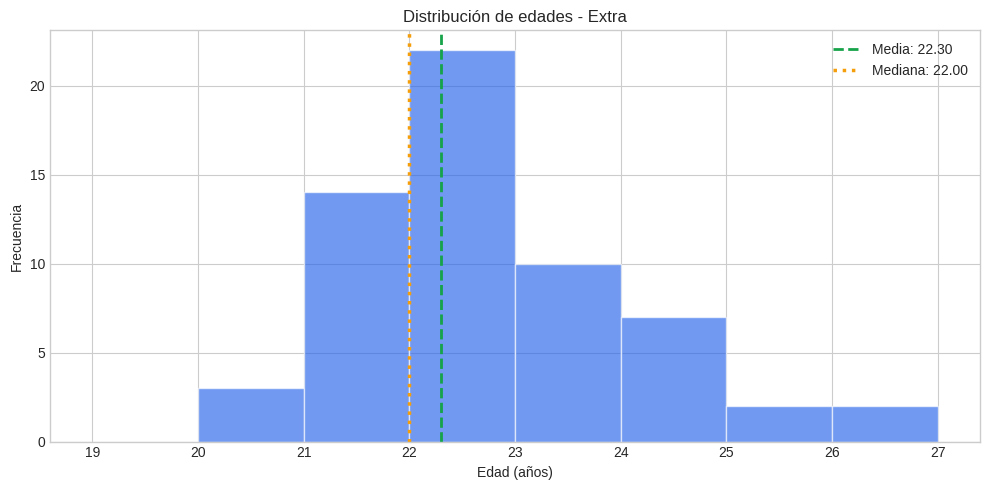

In [27]:
# --- Paleta de colores ---
accent  = '#2563eb'  # azul
accent2 = '#16a34a'  # verde
accent3 = '#f59e0b'  # ámbar
neutral = '#6b7280'  # gris

# =========================
# 1) Histograma de edades
# =========================
fig, ax = plt.subplots(figsize=(10,5))
bins = range(int(df['edad'].min())-1, int(df['edad'].max())+2)
ax.hist(df['edad'], bins=bins, color=accent, edgecolor='white', alpha=0.65)
mean_age = df['edad'].mean()
med_age = df['edad'].median()
ax.axvline(mean_age, color=accent2, linestyle='--', linewidth=2, label=f"Media: {mean_age:.2f}")
ax.axvline(med_age, color=accent3, linestyle=':', linewidth=2.5, label=f"Mediana: {med_age:.2f}")
ax.set_title('Distribución de edades - Extra')
ax.set_xlabel('Edad (años)')
ax.set_ylabel('Frecuencia')
ax.legend()
plt.tight_layout()
plt.show()
fig.savefig('01_hist_edades.png', dpi=180)

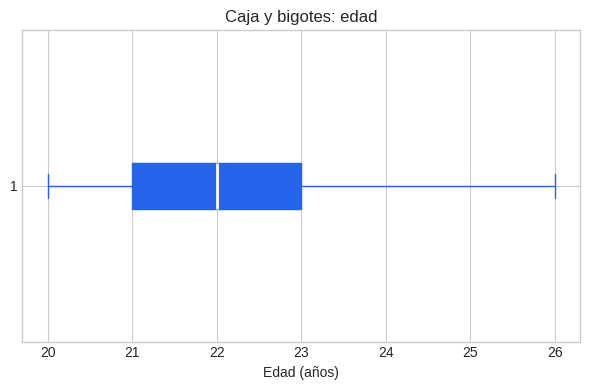

In [4]:
# 2) Boxplot de edades
# =======================
fig, ax = plt.subplots(figsize=(6,4))
ax.boxplot(df['edad'], vert=False, patch_artist=True,
           boxprops=dict(facecolor=accent, color=accent),
           medianprops=dict(color='white', linewidth=2),
           whiskerprops=dict(color=accent), capprops=dict(color=accent))
ax.set_title('Caja y bigotes: edad')
ax.set_xlabel('Edad (años)')
plt.tight_layout()
plt.show()
fig.savefig('02_box_edades.png', dpi=180)

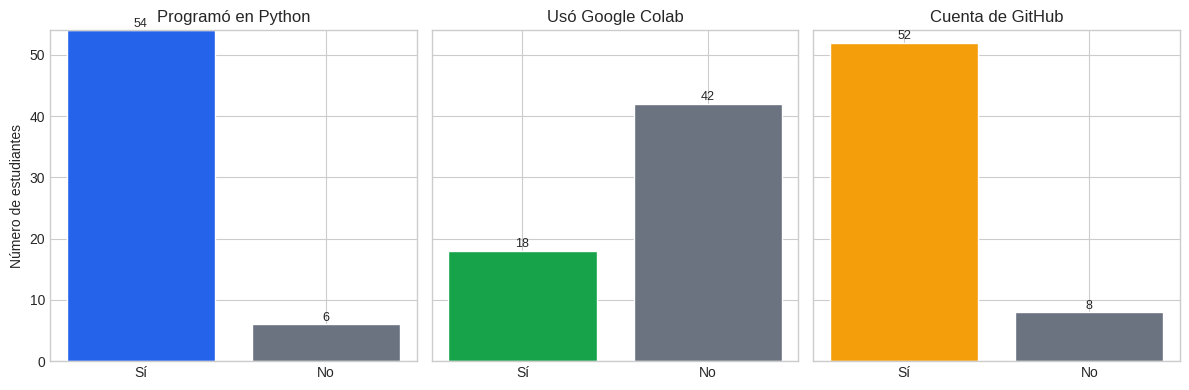

In [5]:
# 3) Barras: frecuencias de Sí/No para Python/Colab/GitHub
# ====================================================
fig, axes = plt.subplots(1,3, figsize=(12,4), sharey=True)
for ax, col, title, color in zip(
    axes,
    ['prog_python','usa_colab','cuenta_github'],
    ['Programó en Python','Usó Google Colab','Cuenta de GitHub'],
    [accent, accent2, accent3]
):
    counts = df[col].value_counts().reindex([True, False]).fillna(0).astype(int)
    labels = ['Sí','No']
    ax.bar(labels, counts, color=[color, neutral], edgecolor='white')
    ax.set_title(title)
    ax.set_ylim(0, max(counts.max(), 1)+2)
    for i, v in enumerate(counts):
        ax.text(i, v+0.1, str(v), ha='center', va='bottom', fontsize=9)
axes[0].set_ylabel('Número de estudiantes')
plt.tight_layout()
plt.show()
fig.savefig('03_barras_frecuencias.png', dpi=180)

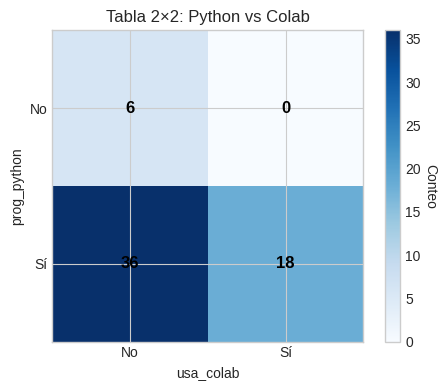

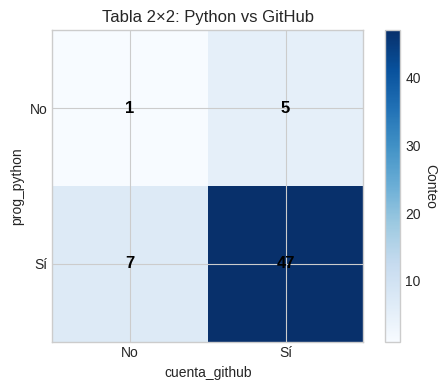

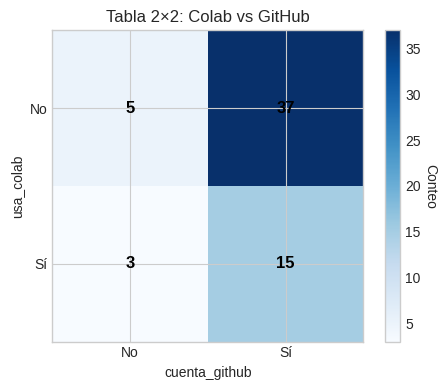

In [7]:
# 4) Mapas de calor 2x2 para combinaciones
# =======================================
pairs = [
    ('prog_python','usa_colab','Python vs Colab'),
    ('prog_python','cuenta_github','Python vs GitHub'),
    ('usa_colab','cuenta_github','Colab vs GitHub')
]

for idx, (a,b,titulo) in enumerate(pairs, start=1):
    a_bool = df[a].to_numpy(dtype=bool)
    b_bool = df[b].to_numpy(dtype=bool)
    t = np.zeros((2,2), dtype=int)
    t[1,1] = np.count_nonzero(a_bool & b_bool)
    t[1,0] = np.count_nonzero(a_bool & ~b_bool)
    t[0,1] = np.count_nonzero(~a_bool & b_bool)
    t[0,0] = np.count_nonzero(~a_bool & ~b_bool)

    fig, ax = plt.subplots(figsize=(5,4))
    im = ax.imshow(t, cmap='Blues')
    ax.set_title(f'Tabla 2×2: {titulo}')
    ax.set_xticks([0,1]); ax.set_xticklabels(['No','Sí'])
    ax.set_yticks([0,1]); ax.set_yticklabels(['No','Sí'])
    ax.set_xlabel(b); ax.set_ylabel(a)

    for i in range(2):
        for j in range(2):
            ax.text(j, i, t[i,j], ha='center', va='center',
                    color='black', fontsize=12, fontweight='bold')

    cbar = fig.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('Conteo', rotation=270, labelpad=12)
    plt.tight_layout()
    plt.show()
    fig.savefig(f'04_heatmap_{idx}.png', dpi=180)

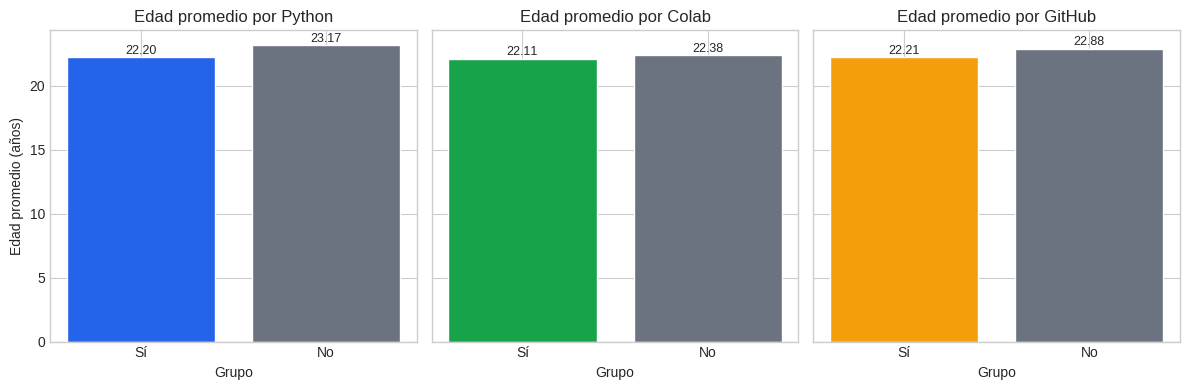

In [8]:
# 5) Barras: edad promedio por grupo (Sí/No) por variable
# ======================================================
fig, axes = plt.subplots(1,3, figsize=(12,4), sharey=True)
for ax, col, title, color in zip(
    axes,
    ['prog_python','usa_colab','cuenta_github'],
    ['Edad promedio por Python','Edad promedio por Colab','Edad promedio por GitHub'],
    [accent, accent2, accent3]
):
    means = df.groupby(col)['edad'].mean().reindex([True, False])
    labels = ['Sí','No']
    bars = ax.bar(labels, means, color=[color, neutral], edgecolor='white')
    for i, v in enumerate(means):
        ax.text(i, v+0.05, f"{v:.2f}", ha='center', va='bottom', fontsize=9)
    ax.set_title(title)
    ax.set_xlabel('Grupo')
axes[0].set_ylabel('Edad promedio (años)')
plt.tight_layout()
plt.show()
fig.savefig('05_barras_edad_promedio.png', dpi=180)


In [10]:
# ===================================
# 6) Estadísticos de edad (impresión)
# ===================================
summary_age = {
    'n': int(df['edad'].size),
    'min': float(df['edad'].min()),
    'p25': float(np.percentile(df['edad'], 25)),
    'mediana': float(df['edad'].median()),
    'media': float(df['edad'].mean()),
    'p75': float(np.percentile(df['edad'], 75)),
    'max': float(df['edad'].max()),
    'rango(ptp)': float(np.ptp(df['edad'])),
    'var_muestral': float(np.var(df['edad'], ddof=1)),
    'std_muestral': float(np.std(df['edad'], ddof=1)),
    'cv': float(np.std(df['edad'], ddof=1)/np.mean(df['edad'])),
}

In [ ]:
df.head(30)

,Marca temporal,Número de matrícula,¿Cuántos años cumplidos tienes?,¿Has realizado programas utilizando Python?,¿Has utilizado Google Colab?,¿Tienes cuenta de GitHub?,edad,prog_python,usa_colab,cuenta_github
0,19/01/2026 18:32:18,178920,22,Si,No,Si,22,True,False,True
1,19/01/2026 18:32:23,182712,21,Si,No,Si,21,True,False,True
2,19/01/2026 18:32:25,180370,26,Si,Si,Si,26,True,True,True
3,19/01/2026 18:32:27,182570,21,Si,Si,Si,21,True,True,True
4,19/01/2026 18:32:28,177622,24,Si,No,Si,24,True,False,True
5,19/01/2026 18:32:29,175166,22,Si,Si,Si,22,True,True,True
6,19/01/2026 18:32:30,177573,22,Si,Si,Si,22,True,True,True
7,19/01/2026 18:32:35,178430,21,Si,Si,Si,21,True,True,True
8,19/01/2026 18:32:38,179169,23,Si,No,Si,23,True,False,True
9,19/01/2026 18:32:41,177263,22,Si,Si,Si,22,True,True,True


In [ ]:
# A NumPy
edad = df['edad'].to_numpy(dtype=float)
prog_py = df['prog_python'].to_numpy(dtype=bool)
usa_colab = df['usa_colab'].to_numpy(dtype=bool)
cuenta_gh = df['cuenta_github'].to_numpy(dtype=bool)

print(f'ndarray edad primeros 5 elementos:  {edad[:5]}')
print(f'ndarray prog_py primeros 5 elementos: {prog_py[:5]}')
print(f'ndarray usa_colab primeros 5 elementos: {usa_colab[:5]}')
print(f'ndarray usa_colab primeros 5 elementos: {usa_colab[-5:]}')

ndarray edad primeros 5 elementos:  [22. 21. 26. 21. 24.]
ndarray prog_py primeros 5 elementos: [ True  True  True  True  True]
ndarray usa_colab primeros 5 elementos: [False False  True  True False]
ndarray usa_colab primeros 5 elementos: [False False False False False]


In [ ]:
# Frecuencias (NumPy)
freq_python = {'Si': int(np.count_nonzero(prog_py)), 'No': int(edad.size - np.count_nonzero(prog_py))}
freq_colab  = {'Si': int(np.count_nonzero(usa_colab)), 'No': int(edad.size - np.count_nonzero(usa_colab))}
freq_gh     = {'Si': int(np.count_nonzero(cuenta_gh)), 'No': int(edad.size - np.count_nonzero(cuenta_gh))}

In [ ]:
print(f'frecuencia de utilizar Python: {freq_python}')
print(f'frecuencia de utilizar Python: {freq_colab}')
print(f'frecuencia de utilizar Python: {freq_gh}')

frecuencia de utilizar Python: {'Si': 54, 'No': 6}
frecuencia de utilizar Python: {'Si': 18, 'No': 42}
frecuencia de utilizar Python: {'Si': 52, 'No': 8}


In [ ]:
# Tablas cruzadas (NumPy)
def tabla2x2(a, b):
    t = np.zeros((2,2), dtype=int)
    t[1,1] = np.count_nonzero(a & b)
    t[1,0] = np.count_nonzero(a & ~b)
    t[0,1] = np.count_nonzero(~a & b)
    t[0,0] = np.count_nonzero(~a & ~b)
    return t

tab_py_colab = tabla2x2(prog_py, usa_colab)
tab_py_gh    = tabla2x2(prog_py, cuenta_gh)
tab_colab_gh = tabla2x2(usa_colab, cuenta_gh)

In [ ]:
print(f'Tabla Python vs Colab \n {tab_py_colab}')
print(f'Tabla Python vs Colab \n {tab_py_gh}')
print(f'Tabla Python vs Colab \n {tab_colab_gh}')

Tabla Python vs Colab 
 [[ 6  0]
 [36 18]]
Tabla Python vs Colab 
 [[ 1  5]
 [ 7 47]]
Tabla Python vs Colab 
 [[ 5 37]
 [ 3 15]]
